In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import math
import random
import warnings
warnings.simplefilter('ignore')
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from skrebate import ReliefF
from sklearn.model_selection import cross_val_score
from numpy import array
from mlxtend.feature_selection import ColumnSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.externals.six import StringIO  
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
%matplotlib inline
from sklearn.cross_decomposition import PLSRegression
import tensorflow as tf

In [210]:
data = pd.read_csv("C:/Users/fzkon/Documents/GitHub/Rice_authenticity_ICP_new/grand.csv")
relief_result = pd.read_csv("C:/Users/fzkon/Documents/GitHub/Rice_authenticity_ICP_new/relief_result_python.csv")
x = data.loc[:, data.columns != 'lv']
y = data.loc[:, data.columns == 'lv']

In [164]:
mask = relief_result['Elements'][0:4]
# x_temp = x[mask]
# x_train, x_test, y_train, y_test = train_test_split(x_temp, y, test_size = 0.2, random_state = 23)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)
y_train_class = pd.get_dummies(y_train)
y_test_class = pd.get_dummies(y_test)

plsda = PLSRegression(n_components=10)
plsda.fit(x_train, y_train_class)

PLSRegression(copy=True, max_iter=500, n_components=10, scale=True, tol=1e-06)

In [108]:
Y_hat = plsda.predict(x_test)

answer = ['GG', 'JS', 'PJ-1', 'PJ-2', 'SY', 'WC']

Y_answer = np.array([answer[np.argmax(i)] for i in Y_hat])

accuracy_score(y_test, Y_answer)

1.0

In [229]:
plsda.score(x_train, y_train_class)

0.958090384977774

In [141]:
data['lv'].unique()

array(['GG', 'PJ-1', 'PJ-2', 'JS', 'SY', 'WC'], dtype=object)

In [142]:
locations= data['lv'].unique()

In [183]:
colormap = {
    'GG': '#e6d933', # red
    'PJ-1': '#0000ff', # blue
    'PJ-2': '#7400a1', # purple
    'JS': '#20b2aa', #green
    'SY': '#ff0000', #yellow #e6d933
    'WC': '#ffe5b4', #light peach  
}

In [185]:
colorlist = [colormap[c] for c in y_train['lv']]

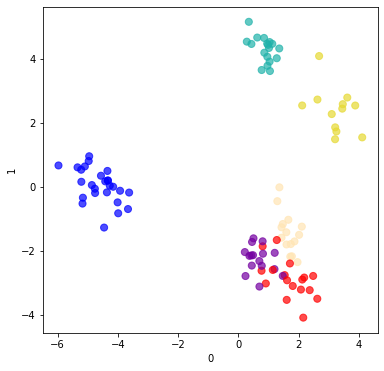

In [218]:
scores = pd.DataFrame(plsda.x_scores_)
scores.index = x_train.index

ax = scores.plot(x=0, y=1, kind='scatter', s=50, alpha=0.7, 
                 c=colorlist, figsize=(6,6))

In [204]:
scores.iloc[:,0]

20     0.369562
103    3.104070
129    1.779034
93     0.349353
34     0.808777
         ...   
76    -5.213827
109    3.214587
31     2.189097
40    -3.926821
83    -4.756931
Name: 0, Length: 104, dtype: float64

In [219]:
p1 = scores.iloc[:,0]
p2 =scores.iloc[:,1]

In [220]:
test = (p1, p2)

In [225]:
colors = ("red", "green", "blue", "red", "green", "blue")
